<a href="https://colab.research.google.com/github/CKBOJI/frontEndBackEnd/blob/main/Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('./index_1.csv', sep=",")

In [ ]:
pd.set_option('display.max_columns', None) # для того, чтобы отображались все столбцы в выводе
data.head(-1)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3630,2025-03-23,2025-03-23 10:07:11.278,card,ANON-0000-0000-1196,35.76,Latte
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa


In [ ]:
data.shape

(3636, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [ ]:
# подсчёт пропусков
data.isna().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
latte = data.query('coffee_name == "Latte"').sort_values(by='date')
latte['year_month'] = pd.to_datetime (latte ['datetime'].astype(str)).dt.to_period ("M")
latte

,date,datetime,cash_type,card,money,coffee_name,year_month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,2024-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,2024-03
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.00,Latte,2024-03
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.00,Latte,2024-03
19,2024-03-03,2024-03-03 10:27:18.561,card,ANON-0000-0000-0015,38.70,Latte,2024-03
...,...,...,...,...,...,...,...
3614,2025-03-21,2025-03-21 17:21:16.930,card,ANON-0000-0000-1165,35.76,Latte,2025-03
3615,2025-03-21,2025-03-21 17:22:49.875,card,ANON-0000-0000-1191,35.76,Latte,2025-03
3627,2025-03-22,2025-03-22 16:26:59.766,card,ANON-0000-0000-1274,35.76,Latte,2025-03
3630,2025-03-23,2025-03-23 10:07:11.278,card,ANON-0000-0000-1196,35.76,Latte,2025-03


In [ ]:
latte.dtypes

,0
date,object
datetime,object
cash_type,object
card,object
money,float64
coffee_name,object


In [ ]:
latte_agg = latte.groupby('date')['money'] \
        .agg(['count', 'sum'])
latte_agg.columns = ['count', 'sum']
latte_agg

,count,sum
date,,
2024-03-01,2,77.40
2024-03-02,1,40.00
2024-03-03,2,78.70
2024-03-04,2,77.40
2024-03-05,3,116.10
...,...,...
2025-03-19,3,107.28
2025-03-20,1,35.76
2025-03-21,6,214.56


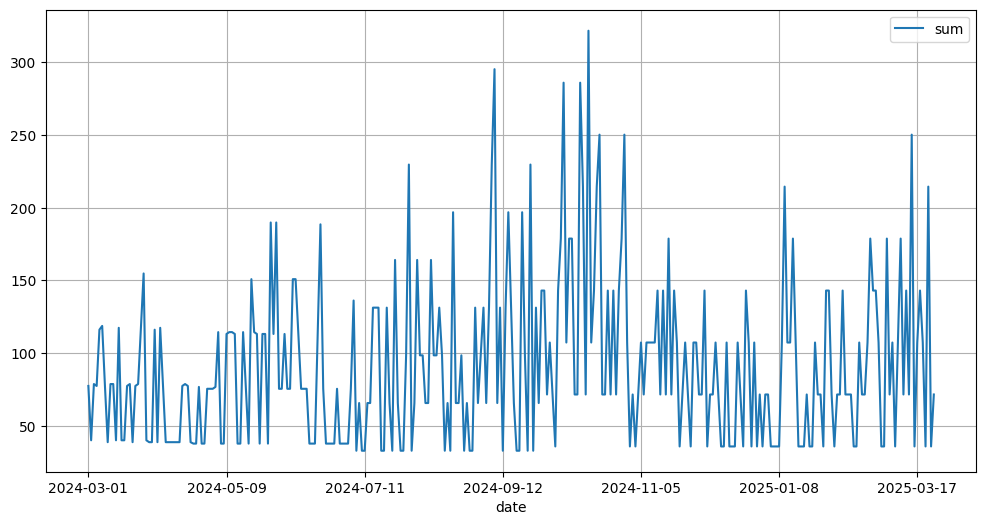

In [ ]:
latte_agg.pivot_table(index='date', values='sum').plot(grid=True, figsize = (12,6))
plt.show()

In [ ]:
import datetime

In [ ]:
latte_agg_month_year = latte.groupby('year_month')['money'] \
        .agg(['count', 'sum'])
latte_agg_month_year.columns = ['count', 'sum']
latte_agg_month_year

,count,sum
year_month,,
2024-03,48,1874.50
2024-04,31,1193.12
2024-05,58,2198.00
2024-06,50,1886.00
2024-07,56,1857.52
2024-08,58,1903.56
2024-09,94,3114.48
2024-10,120,4291.20
2024-11,68,2431.68


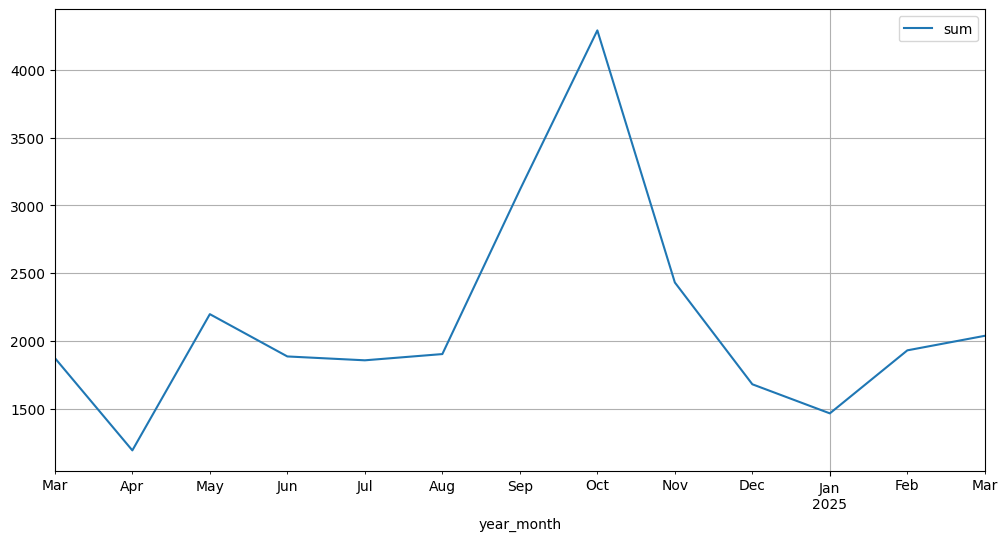

In [ ]:
latte_agg_month_year.pivot_table(index='year_month', values='sum').plot(grid=True, figsize = (12,6))
plt.show()